# 필요 라이브러리 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [3]:
data = pd.read_csv('./data/ml_data/boston.csv')

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 군집화

군집화를 통해서 비슷한 성향을 가진 그룹을 찾아보자.

In [5]:
# 범주형 데이터 제거
del data['chas']

In [6]:
# 나중에 비교를 위한 medv 컬럼도 복사 후 제거

medv = data['medv']
del data['medv']

In [7]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축.
# 필요 라이브러리를 불러오기.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
# 정규화 진행
# 객체 생성
scaler = StandardScaler()

In [9]:
# 데이터 학습
scaler.fit(data)
# 변환
scaler_data = scaler.transform(data)

In [10]:
# 객체 생성
pca = PCA(n_components = 2)

In [11]:
# PCA 학습시키기
pca.fit(scaler_data)

PCA(n_components=2)

In [12]:
# 결과값 확인
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [13]:
# 데이터 프레임 형태로 변환
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# 몇 개로 군집화를 해야할까?

- 위의 데이터를 몇 개의 군집화로 나누는것이 가장 올바른 군집화인지 살펴보자

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [14]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

In [15]:
x = []  # K가 몇 개인지
y = []  # 응집도가 몇인지

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

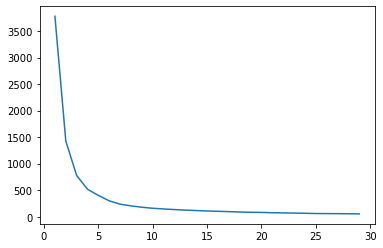

In [16]:
# 그래프 그리기
plt.plot(x, y)

# ELBOW POINT 4 지정 후 클러스터링 시작

In [17]:
kmeans = KMeans(n_clusters = 4)

In [18]:
kmeans.fit(data2)

KMeans(n_clusters=4)

In [19]:
data2['labels'] = kmeans.predict(data2)

In [20]:
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,0
1,-1.456003,-0.947694,0
2,-2.073454,-0.625336,0
3,-2.610161,-0.134044,0
4,-2.456866,-0.229919,0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

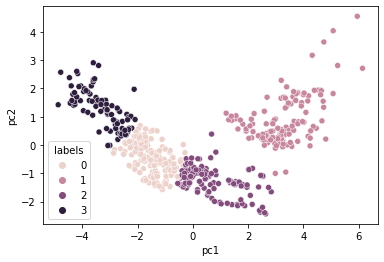

In [21]:
sns.scatterplot(data = data2, x = 'pc1', y = 'pc2', hue = 'labels')